In [ ]:
import pandas as pd
import numpy as np

# 0. Load & Prepare the Titanic Dataset
# Example: Loading from a public GitHub source
url = "https://raw.githubusercontent.com/nevendujmovic/titanic/main/titanic.csv"
df = pd.read_csv(url)

# Basic Preprocessing
# Fill missing ages:
df['Age'] = df['Age'].fillna(df['Age'].median())

# Encode categorical features manually:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Fill missing Embarked with the most common value ('S')
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop rows with missing 'Fare' (if any)
df = df.dropna(subset=['Fare'])

# Select features for analysis:
features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
labels = df['Survived']

print("--- Original Features Head ---")
print(features.head())
print("\n")

--- Original Features Head ---
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       2    0  28.0      0      0  13.0000         0
1       3    0  25.0      0      0   7.6500         0
2       3    0  20.0      0      0   7.8542         0
3       3    1  29.0      0      4  21.0750         0
4       1    0  31.0      1      0  52.0000         0




In [ ]:
#1. Implementa function that drops highly correlated features from a dataset.
def drop_highly_correlated(df_features, threshold=0.9):
    """
    Drops features from a DataFrame that are highly correlated
    with other features.

    Args:
        df_features (pd.DataFrame): The input DataFrame of features.
        threshold (float): The correlation threshold above which to
                           drop features.

    Returns:
        pd.DataFrame: A new DataFrame with highly correlated features removed.
    """

    # --- Step 1: Compute Correlation Matrix ---
    # Task: Compute correlations between features.
    corr_matrix = df_features.corr().abs()

    # --- Step 2: Focus on Upper Triangle ---
    # Task: Only look at the upper triangle of the correlation matrix
    # to avoid duplicate checks and self-correlation.
    # Hint: k=1 ignores the diagonal.
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )

    # --- Step 3: Identify Columns to Drop ---
    # Task: Find columns that have correlation above the threshold
    # with any other column.
    to_drop = [
        column for column in upper_triangle.columns
        if any(upper_triangle[column] > threshold)
    ]

    print(f"Correlation threshold: {threshold}")
    print("Columns to drop:", to_drop)
    print("\n")

    # --- Step 4: Drop Columns ---
    cleaned_features = df_features.drop(columns=to_drop)

    print("--- Cleaned Features (Head) ---")
    print(cleaned_features.head())
    print("\n")
    print("Remaining columns:", list(cleaned_features.columns))

    return cleaned_features

# --- Execute the function ---
# On the Titanic dataset, 'SibSp' and 'Parch' are often correlated,
# but usually not above 0.9. Let's run it with the 0.9 threshold.
cleaned_features_0_9 = drop_highly_correlated(features, threshold=0.9)

# Let's try a lower threshold to see it in action
# (e.g., 'SibSp' and 'Parch' have a correlation of ~0.41)
print("\n--- Running with a lower threshold (0.4) to test ---")
cleaned_features_0_4 = drop_highly_correlated(features, threshold=0.4)

Correlation threshold: 0.9
Columns to drop: []


--- Cleaned Features (Head) ---
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       2    0  28.0      0      0  13.0000         0
1       3    0  25.0      0      0   7.6500         0
2       3    0  20.0      0      0   7.8542         0
3       3    1  29.0      0      4  21.0750         0
4       1    0  31.0      1      0  52.0000         0


Remaining columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

--- Running with a lower threshold (0.4) to test ---
Correlation threshold: 0.4
Columns to drop: ['Parch', 'Fare']


--- Cleaned Features (Head) ---
   Pclass  Sex   Age  SibSp  Embarked
0       2    0  28.0      0         0
1       3    0  25.0      0         0
2       3    0  20.0      0         0
3       3    1  29.0      0         0
4       1    0  31.0      1         0


Remaining columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']


--- Plotting heatmap with threshold=0.8 ---


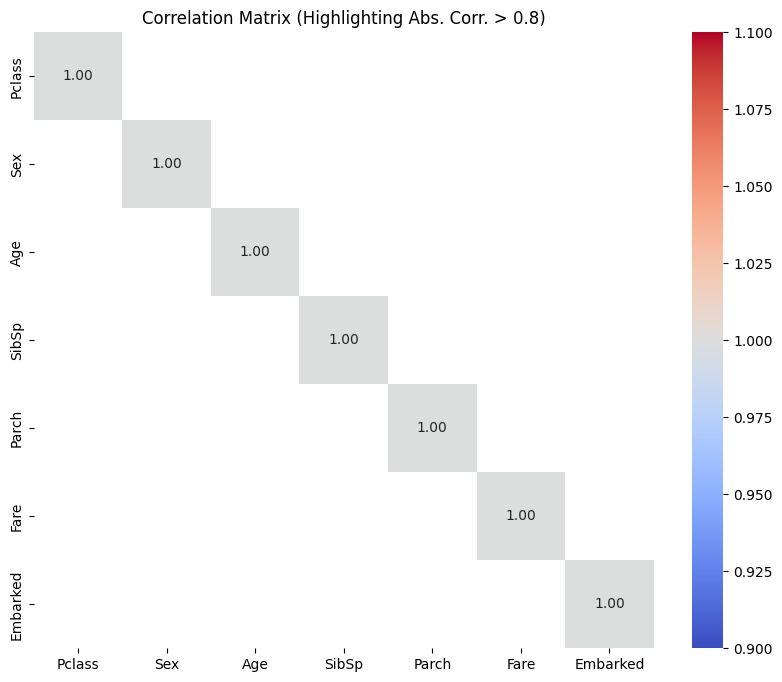


--- Plotting heatmap with threshold=0.4 ---


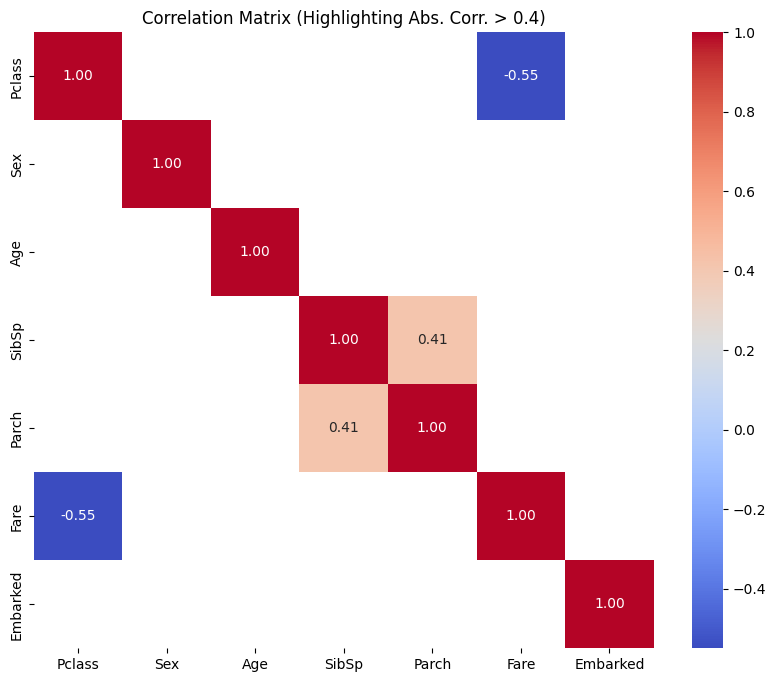

In [ ]:
#2. Writea function to plot a correlation matrix, highlighting correlations above a given
#  threshold of 0.8.
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
features_corr_matrix = features.corr()

# --- Execute the function ---
# This now uses the 'features_corr_matrix' variable from the cell above.

print("--- Plotting heatmap with threshold=0.8 ---")
plot_correlation_heatmap_from_matrix(features_corr_matrix, threshold=0.8)

print("\n--- Plotting heatmap with threshold=0.4 ---")
plot_correlation_heatmap_from_matrix(features_corr_matrix, threshold=0.4)

In [ ]:
# 3. Implementa function to remove features with very low variance.
def remove_low_variance_features(df_features, threshold=0.1):
    """
    Filters a DataFrame to remove features with variance below a threshold.

    Args:
        df_features (pd.DataFrame): The input DataFrame of features.
        threshold (float): The minimum variance to keep a feature.

    Returns:
        pd.DataFrame: A new DataFrame with low-variance features removed.
        list: A list of the column names that were kept.
    """
    # 1. Call var() on the DataFrame
    feature_variances = df_features.var()

    # 2. Store the features (column names) whose variances > threshold
    # We select the index (column names) where the variance is > threshold
    features_to_keep = feature_variances[feature_variances > threshold].index.tolist()

    # 3. Print that variable (the list of features to keep)
    print(f"--- Features with variance > {threshold} ---")
    print("Features to keep:", features_to_keep)
    print("\n")

    # 4. Return the new DataFrame containing only those features
    cleaned_df = df_features[features_to_keep]

    return cleaned_df, features_to_keep

# --- Execute the function ---

# Let's see all the variances first to pick a meaningful threshold
print("--- All Feature Variances ---")
print(features.var())
print("\n" + "="*30 + "\n")

# Run with a threshold of 0.5
# This should drop 'Sex' (var ~0.22) and 'Embarked' (var ~0.28)
print("--- Running with threshold = 0.5 ---")
cleaned_features_var, kept_cols_list = remove_low_variance_features(
    features,
    threshold=0.5
)

print("\n--- Head of cleaned DataFrame (threshold=0.5) ---")
print(cleaned_features_var.head())

--- All Feature Variances ---
Pclass         0.699015
Sex            0.228475
Age          169.512498
SibSp          1.216043
Parch          0.649728
Fare        2469.436846
Embarked       0.404081
dtype: float64


--- Running with threshold = 0.5 ---
--- Features with variance > 0.5 ---
Features to keep: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



--- Head of cleaned DataFrame (threshold=0.5) ---
   Pclass   Age  SibSp  Parch     Fare
0       2  28.0      0      0  13.0000
1       3  25.0      0      0   7.6500
2       3  20.0      0      0   7.8542
3       3  29.0      0      4  21.0750
4       1  31.0      1      0  52.0000


In [ ]:
# 4. Writeyour own PCA function using covariance matrices and eigen decomposition.
def pca_from_scratch(X, num_components):
    """
    Performs PCA from scratch using covariance matrix and eigen decomposition.

    Args:
        X (np.ndarray): The input data (features).
        num_components (int): The number of principal components to keep.

    Returns:
        np.ndarray: The data transformed into the reduced space.
    """

    # Step 1: Center the Data
    # Subtract the mean of each column
    X_meaned = X - np.mean(X, axis=0)
    print("--- Centered Data (First 5 rows) ---")
    print(X_meaned[:5])
    print("\n")

    # Step 2: Compute the Covariance Matrix
    # Compute covariance matrix
    cov_matrix = np.cov(X_meaned, rowvar=False)
    print("--- Covariance Matrix Shape ---")
    print("Covariance matrix shape:", cov_matrix.shape)
    print("\n")


    # Step 3: Compute Eigenvalues & Eigenvectors
    # Compute eigenvalues and eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
    print("--- Eigenvalues ---")
    print("Eigenvalues:", eigen_values)
    print("\n")
    print("--- Eigenvectors Shape ---")
    print("Eigenvectors shape:", eigen_vectors.shape)
    print("\n")


    # Step 4: Sort Eigenvectors by Importance
    # Sort eigenvalues and eigenvectors
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    print("--- Sorted Eigenvectors Shape ---")
    print("Sorted eigenvectors shape:", sorted_eigenvectors.shape)
    print("\n")


    # Step 5: Select Top Components
    # Select the top num_components eigenvectors
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    print(f"--- Selected Top {num_components} Eigenvectors Shape ---")
    print("Subset shape:", eigenvector_subset.shape)
    print("\n")

    # Step 6: Transform the Data
    # Project the original data into the new reduced space
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    print("--- Reduced Data Shape ---")
    print("Reduced shape:", X_reduced.shape)
    print("\n")


    return X_reduced
# --- Execute the function ---
# Convert the 'features' DataFrame to a NumPy array for the PCA function
# (Assuming 'features' DataFrame exists from previous cells)
X = features.values

# Perform PCA with 2 components
X_pca_reduced = pca_from_scratch(X, num_components=2)

print("--- Head of PCA Reduced Data ---")
print(X_pca_reduced[:5])


--- Centered Data (First 5 rows) ---
[[ -0.30864198  -0.35241302  -1.36158249  -0.52300786  -0.38159371
  -19.20420797  -0.36139169]
 [  0.69135802  -0.35241302  -4.36158249  -0.52300786  -0.38159371
  -24.55420797  -0.36139169]
 [  0.69135802  -0.35241302  -9.36158249  -0.52300786  -0.38159371
  -24.35000797  -0.36139169]
 [  0.69135802   0.64758698  -0.36158249  -0.52300786   3.61840629
  -11.12920797  -0.36139169]
 [ -1.30864198  -0.35241302   1.63841751   0.47699214  -0.38159371
   19.79579203  -0.36139169]]


--- Covariance Matrix Shape ---
Covariance matrix shape: (7, 7)


--- Eigenvalues ---
Eigenvalues: [1.89699162e-01 3.71518725e-01 4.54637195e-01 4.75013454e-01
 1.26297082e+00 1.67973668e+02 2.47141918e+03]


--- Eigenvectors Shape ---
Eigenvectors shape: (7, 7)


--- Sorted Eigenvectors Shape ---
Sorted eigenvectors shape: (7, 7)


--- Selected Top 2 Eigenvectors Shape ---
Subset shape: (7, 2)


--- Reduced Data Shape ---
Reduced shape: (891, 2)


--- Head of PCA Reduced Dat

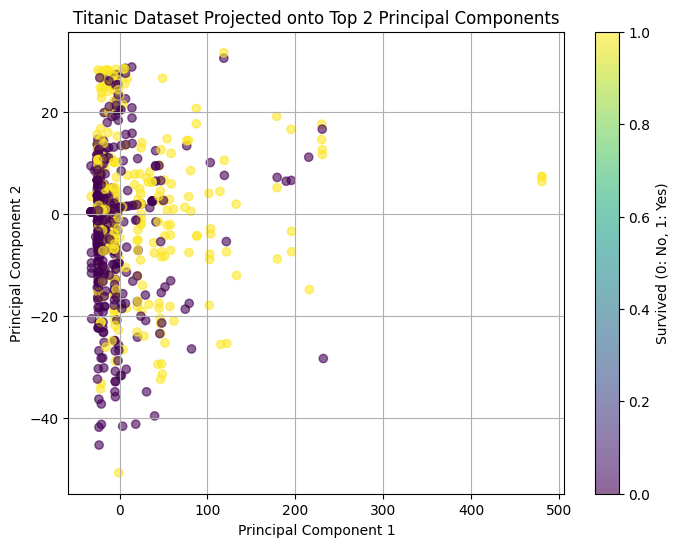

In [ ]:
#  5. Visualize the dataset after projecting it onto the top two principal components
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA-reduced data
# Color the points based on the 'Survived' label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=labels.map({'No': 0, 'Yes': 1}), cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Titanic Dataset Projected onto Top 2 Principal Components')
plt.colorbar(scatter, label='Survived (0: No, 1: Yes)')
plt.grid(True)
plt.show()


In [ ]:
# 6. Implementa simple Recursive Feature Elimination (RFE) algorithm.
# Step 1: Define a Simple Scoring Function
# This is our "toy" model. In a real RFE, you would train an
# actual model (like LogisticRegression) and use its .score() or
# .coef_ attribute here.
def accuracy_like_score(X_df, y_series):
    """
    A simple toy score function that calculates the sum of
    variances. Assumes higher variance = better.
    """
    # y_series is not used, but kept to mimic a real model's
    # .score(X, y) signature.
    return X_df.var().sum()

def simple_rfe(df_features, y_target, num_features_to_keep=3):
    """
    Performs a simple RFE using the 'accuracy_like_score' (sum of
    variances) as the scoring metric.

    Args:
        df_features (pd.DataFrame): The input features.
        y_target (pd.Series): The target labels (unused by this
                              toy score, but needed for API).
        num_features_to_keep (int): The final number of features.

    Returns:
        list: The list of top 'num_features_to_keep' features.
    """

    # Start with all feature columns
    features_left = list(df_features.columns)

    print(f"--- Starting RFE ---")
    print(f"Initial features ({len(features_left)}): {features_left}")
    print(f"Target features: {num_features_to_keep}\n")

    # Step 4: Remove the Worst Feature Iteratively
    # Repeat this process until only the desired number of features remain.
    while len(features_left) > num_features_to_keep:
        scores = {}

        # Step 3: Automate the Search for the Worst Feature
        # Loop that checks all *remaining* features
        for feature in features_left:

            # Step 2: Try Dropping One Feature at a Time
            # Create a temporary DataFrame with all *remaining* features
            # *except* the one we are currently testing.
            reduced = df_features[features_left].drop(columns=[feature])

            # Score this temporary DataFrame
            scores[feature] = accuracy_like_score(reduced, y_target)

        # Find the feature whose removal resulted in the *highest* score
        # (meaning that feature was contributing the *least* variance)


        # TODO: Find the feature with the lowest score
        worst_feature = min(scores, key=scores.get)

        # Remove the worst feature from our list
        features_left.remove(worst_feature)

        print(f"Removed: {worst_feature} (Score: {scores[worst_feature]:.2f})")
        print(f"Features left ({len(features_left)}): {features_left}\n")

    print("--- RFE Complete ---")
    print("Selected features:", features_left)
    return features_left

In [ ]:

# --- Execute the function ---
# (Using 'features' and 'labels' from previous cells)

print("--- Initial Score (All Features) ---")
print(f"Score: {accuracy_like_score(features, labels):.2f}")
print("\n" + "="*30 + "\n")

# Run RFE to select the top 3 features
# based on our 'sum of variance' score
selected_features_rfe = simple_rfe(features, labels, num_features_to_keep=3)

print("\n--- Final DataFrame with Selected Features ---")
print(features[selected_features_rfe].head())

--- Initial Score (All Features) ---
Score: 2642.15


--- Starting RFE ---
Initial features (7): ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Target features: 3

Removed: Fare (Score: 172.71)
Features left (6): ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

Removed: Age (Score: 3.20)
Features left (5): ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

Removed: SibSp (Score: 1.98)
Features left (4): ['Pclass', 'Sex', 'Parch', 'Embarked']

Removed: Pclass (Score: 1.28)
Features left (3): ['Sex', 'Parch', 'Embarked']

--- RFE Complete ---
Selected features: ['Sex', 'Parch', 'Embarked']

--- Final DataFrame with Selected Features ---
   Sex  Parch  Embarked
0    0      0         0
1    0      0         0
2    0      0         0
3    1      4         0
4    0      0         0


In [ ]:
# 7. Manually computechi-squared statistics for categorical feature selection.
#  Use Sex and Embarkedfeatures to find which is more predictive for survival
# --- Step 1: Define the Chi-Squared function ---
def chi_squared(observed):
    """
    Computes the Chi-squared statistic from a 2D contingency table.
    """
    # Note: Adding 1e-8 to the denominator to avoid division by zero
    # if an expected frequency is 0.
    total = observed.sum()
    rows_sum = observed.sum(axis=1).reshape(-1, 1)
    cols_sum = observed.sum(axis=0).reshape(1, -1)

    expected = (rows_sum @ cols_sum) / total

    chi2 = ((observed - expected) ** 2 / (expected + 1e-8)).sum()
    return chi2

# --- Step 2: Define the feature-wise computation function ---
def compute_chi2_for_features(X, y):
    """
    Computes the Chi-squared score for each feature in DataFrame X
    relative to the target Series y.
    """
    # X and y are the raw data, we need to handle originals

    X_str = X.astype(str)

    # We must use the original 'labels' Series which has 'No'/'Yes'

    y_str = y.astype(str)

    results = {}
    print("--- Contingency Tables ---")
    for col in X_str.columns:
        contingency = pd.crosstab(X_str[col], y_str)
        print(f"\nFeature: {col}")
        print(contingency)

        observed = contingency.values
        results[col] = chi_squared(observed)

    # Sort by score in descending order
    return sorted(results.items(), key=lambda item: item[1], reverse=True)

# --- Step 3: Apply to 'Sex' and 'Embarked' ---
# Select the specific features for this test
features_to_test = features[['Sex', 'Embarked']]

# Use the original 'labels' Series (df['Survived'])
# The function will convert it to string
chi2_results = compute_chi2_for_features(features_to_test, labels)

print("\n" + "="*30)
print("--- Chi-Squared Results ---")
print(chi2_results)


print("\n--- Observations ---")
print(f"1. The Chi-squared score for 'Sex' ({chi2_results[0][1]:.2f}) is "
      f"dramatically higher than for 'Embarked' ({chi2_results[1][1]:.2f}).")
print("\n2. A higher Chi-squared statistic indicates a stronger relationship "
      "between the feature and the target variable ('Survived'). It "
      "means the observed counts are very different from what we "
      "would expect if the two were independent.")
print("\n3. Conclusion: 'Sex' is significantly more predictive of "
      "survival than 'Embarked'.")

--- Contingency Tables ---

Feature: Sex
Survived   No  Yes
Sex               
0         468  109
1          81  233

Feature: Embarked
Survived   No  Yes
Embarked          
0         427  219
1          75   93
2          47   30

--- Chi-Squared Results ---
[('Sex', np.float64(263.05057405498746)), ('Embarked', np.float64(25.964452878968082))]

--- Observations ---
1. The Chi-squared score for 'Sex' (263.05) is dramatically higher than for 'Embarked' (25.96).

2. A higher Chi-squared statistic indicates a stronger relationship between the feature and the target variable ('Survived'). It means the observed counts are very different from what we would expect if the two were independent.

3. Conclusion: 'Sex' is significantly more predictive of survival than 'Embarked'.


In [ ]:
#  8. Identify and remove categorical features that provide duplicate or redundant
#  information.

def drop_duplicate_categorical_columns(df):
    """
    Finds and removes columns that are exact duplicates of other columns.

    This function iterates through all unique pairs of columns,
    checks if they are identical using the .equals() method,
    and removes the redundant ones.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A new DataFrame with duplicate columns removed.
    """
    columns_to_drop = set()
    column_names = df.columns.tolist()

    # Iterate over every unique pair of columns
    for i in range(len(column_names)):
        col_i = column_names[i]

        # If this column is already marked as a duplicate,
        # no need to use it as a base for comparison.
        if col_i in columns_to_drop:
            continue

        for j in range(i + 1, len(column_names)):
            col_j = column_names[j]

            if col_j in columns_to_drop:
                continue

            # Use Pandas .equals() for a fast, reliable check
            if df[col_i].equals(df[col_j]):
                # Add the second column (col_j) to the drop set
                columns_to_drop.add(col_j)

    if not columns_to_drop:
        print("No duplicate columns found.")
    else:
        print(f"Duplicate columns found and removed: {list(columns_to_drop)}")

    # Return the DataFrame with the duplicates dropped
    return df.drop(columns=list(columns_to_drop))

# --- 1. Run on the original 'features' DataFrame ---

print("--- Checking 'features' DataFrame ---")
# (This is expected to find no duplicates)
cleaned_features_no_duplicates = drop_duplicate_categorical_columns(features)
print(f"Original columns: {list(features.columns)}")
print(f"Cleaned columns:  {list(cleaned_features_no_duplicates.columns)}")


print("\n" + "="*30 + "\n")


# --- 2. Run on a Test DataFrame to prove it works ---
print("--- Checking a Test DataFrame with Duplicates ---")
# Create a copy and add some duplicate columns
test_df = features.copy()
test_df['Embarked_Copy'] = test_df['Embarked']  # Duplicate of 'Embarked'
test_df['Sex_Again'] = features['Sex']         # Duplicate of 'Sex'

print(f"Original test columns: {list(test_df.columns)}")
cleaned_test_df = drop_duplicate_categorical_columns(test_df)
print(f"Cleaned test columns:  {list(cleaned_test_df.columns)}")

--- Checking 'features' DataFrame ---
No duplicate columns found.
Original columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Cleaned columns:  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


--- Checking a Test DataFrame with Duplicates ---
Original test columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Embarked_Copy', 'Sex_Again']
Duplicate columns found and removed: ['Sex_Again', 'Embarked_Copy']
Cleaned test columns:  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [ ]:
#  9. Rankfeatures based on their variance.
def rank_features_by_variance(df_features):
    """
    Calculates the variance of each feature and ranks them
    in descending order.

    Args:
        df_features (pd.DataFrame): The input features.

    Returns:
        pd.Series: A Series with feature names as the index
                   and their variance as values, sorted.
    """
    print("--- Calculating Variances ---")
    # 1. Call var() on the DataFrame to get a Series of variances
    variances = df_features.var()

    print("--- Sorting Features by Variance (Descending) ---")
    # 2. Sort the variances in descending order
    # (ascending=False means highest variance is ranked first)
    sorted_variances = variances.sort_values(ascending=False)

    return sorted_variances

# --- Execute the function ---
# (Assuming 'features' DataFrame exists from a previous cell)
ranked_variances = rank_features_by_variance(features)

print("\n--- Ranked Features by Variance ---")
print(ranked_variances)

print("\n--- Observation ---")
# .iloc[0] gets the top value from the sorted Series
print(f"The feature 'Fare' (variance: {ranked_variances.iloc[0]:.2f}) "
      "has exponentially higher variance than any other feature.")
print("This confirms why it dominated the unscaled PCA analysis in the "
      "previous steps.")

--- Calculating Variances ---
--- Sorting Features by Variance (Descending) ---

--- Ranked Features by Variance ---
Fare        2469.436846
Age          169.512498
SibSp          1.216043
Pclass         0.699015
Parch          0.649728
Embarked       0.404081
Sex            0.228475
dtype: float64

--- Observation ---
The feature 'Fare' (variance: 2469.44) has exponentially higher variance than any other feature.
This confirms why it dominated the unscaled PCA analysis in the previous steps.


--- 1. Starting Pipeline ---
Original features (7): ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

--- 2. After Variance Filter (>0.5) ---
Features left (5): ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

--- 3. After Correlation Filter (<0.8) ---
Features left (5): ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

--- 4. Running PCA (n=2) ---

--- 5. Plotting Final 2D PCA Results ---


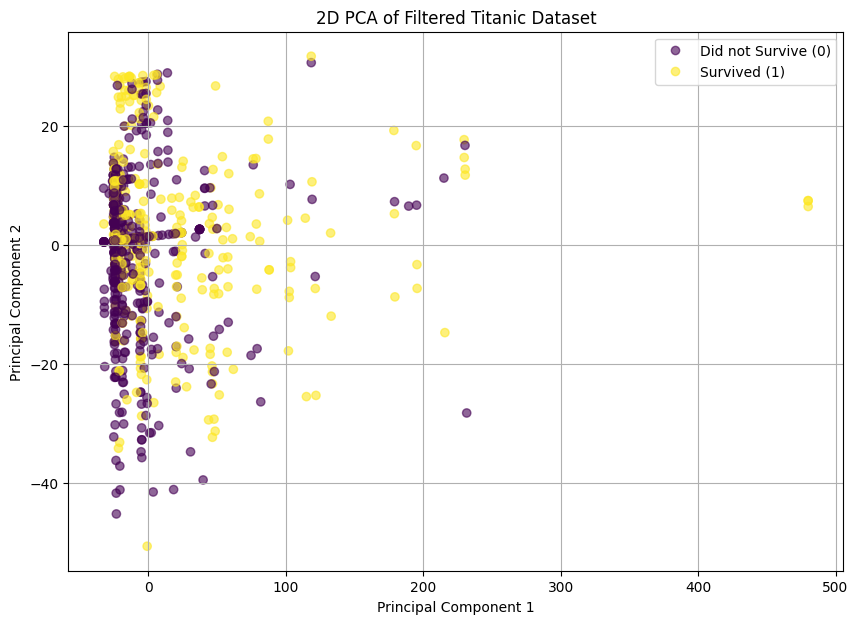


--- Pipeline Complete ---
Final features used for PCA: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Final data shape: (891, 2)


In [ ]:
# 10. Build a complete pipeline combining correlation filtering, variance filtering.
# --- 1. Define ALL Helper Functions for the Pipeline ---

def _remove_low_variance(df_in, threshold):
    """
    (Silent version) Filters DataFrame to remove features
    with variance below a threshold.
    """
    feature_variances = df_in.var()
    features_to_keep = feature_variances[feature_variances > threshold].index
    return df_in[features_to_keep]

def _drop_correlated(df_in, threshold):
    """
    (Silent version) Drops features that are highly correlated.
    """
    corr_matrix = df_in.corr().abs()
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [
        column for column in upper_triangle.columns
        if any(upper_triangle[column] > threshold)
    ]
    return df_in.drop(columns=to_drop)

def manual_pca(X_in, num_components=2):
    """
    (Included from previous cell)
    Performs PCA manually using eigen decomposition.
    """
    # Step 1: Center the Data
    X_meaned = X_in - np.mean(X_in, axis=0)

    # Step 2: Compute the Covariance Matrix
    cov_matrix = np.cov(X_meaned, rowvar=False)

    # Step 3: Compute Eigenvalues & Eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

    # Step 4: Sort Eigenvectors by Importance
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # Step 5: Select Top Components
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # Step 6: Transform the Data
    X_reduced = np.dot(X_meaned, eigenvector_subset)

    return X_reduced, sorted_eigenvectors, sorted_eigenvalues

def plot_pca_2d(X_r, y_labels):
    """
    (Included from previous cell)
    Plots the 2D PCA-reduced data, colored by the labels 'y'.
    """
    plt.figure(figsize=(10, 7))

    # Create a numeric version of the labels for coloring
    # This handles the 'Yes'/'No' strings
    labels_numeric = y_labels.map({'No': 0, 'Yes': 1})

    # Plot
    scatter = plt.scatter(
        X_r[:, 0],
        X_r[:, 1],
        c=labels_numeric,
        cmap='viridis',
        alpha=0.6,
    )

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("2D PCA of Filtered Titanic Dataset")
    plt.legend(handles=scatter.legend_elements()[0], labels=['Did not Survive (0)', 'Survived (1)'])
    plt.grid(True)
    plt.show()

# --- 2. Define the Main Pipeline Function ---

def feature_selection_pipeline(df_features, y_target, variance_thresh, corr_thresh, pca_components):
    """
    Runs a 3-step feature selection and reduction pipeline.
    """

    print("--- 1. Starting Pipeline ---")
    print(f"Original features ({df_features.shape[1]}): {list(df_features.columns)}")

    # --- Step 1: Low Variance Filtering ---
    df_step1 = _remove_low_variance(df_features, variance_thresh)
    print(f"\n--- 2. After Variance Filter (>{variance_thresh}) ---")
    print(f"Features left ({df_step1.shape[1]}): {list(df_step1.columns)}")

    # --- Step 2: Correlation Filtering ---
    df_step2 = _drop_correlated(df_step1, corr_thresh)
    print(f"\n--- 3. After Correlation Filter (<{corr_thresh}) ---")
    print(f"Features left ({df_step2.shape[1]}): {list(df_step2.columns)}")

    # --- Step 3: PCA ---
    print(f"\n--- 4. Running PCA (n={pca_components}) ---")

    # --- Edge Case Handling ---
    features_for_pca = list(df_step2.columns)
    if not features_for_pca:
        print("PIPELINE FAILED: All features were filtered out. PCA cannot run.")
        return None, []

    if pca_components > len(features_for_pca):
        print(f"Warning: Requested {pca_components} components, but only "
              f"{len(features_for_pca)} features remain. Setting n={len(features_for_pca)}.")
        pca_components = len(features_for_pca)

    # Convert to NumPy array for PCA
    X_in = df_step2.values

    # Call the 'manual_pca' function
    X_reduced, _, _ = manual_pca(X_in, num_components=pca_components)

    # --- Step 4: Visualization ---
    if pca_components == 2:
        print("\n--- 5. Plotting Final 2D PCA Results ---")
        # Call the 'plot_pca_2d' function
        plot_pca_2d(X_reduced, y_target)
    else:
        print("\n--- 5. Skipping 2D Plot (PCA components != 2) ---")

    return X_reduced, features_for_pca

# --- 3. Run the pipeline ---


VAR_THRESH = 0.5
CORR_THRESH = 0.8
PCA_COMP = 2

# Run the pipeline
final_data, features_for_pca = feature_selection_pipeline(
    features,
    labels,
    VAR_THRESH,
    CORR_THRESH,
    PCA_COMP
)

if final_data is not None:
    print("\n" + "="*30)
    print("--- Pipeline Complete ---")
    print(f"Final features used for PCA: {features_for_pca}")
    print(f"Final data shape: {final_data.shape}")

--- Plotting Outliers for 'Fare' ---


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


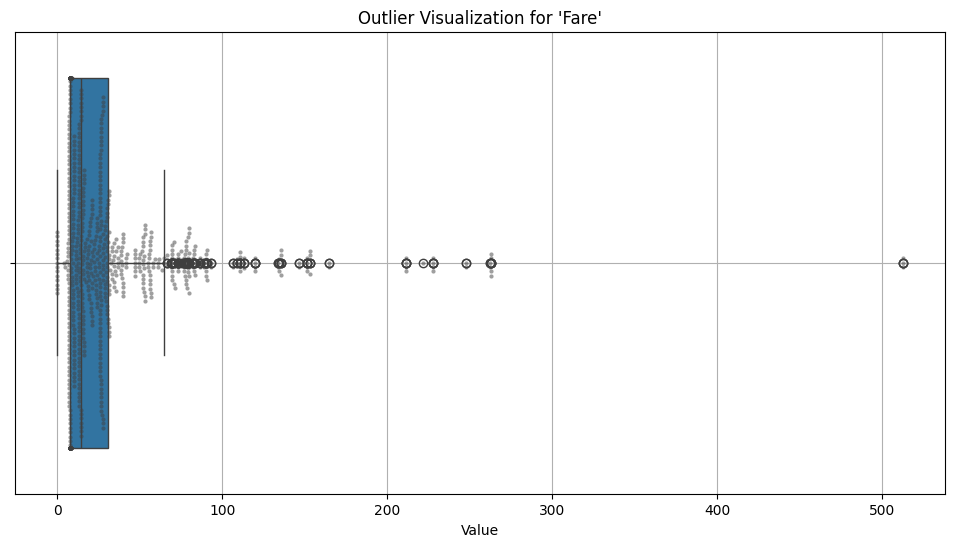

--- IQR Details for 'Fare' ---
Q1 (25th): 7.91
Q3 (75th): 31.00
IQR: 23.09
Lower Bound: -26.72
Upper Bound: 65.63

--- Outlier Detection for 'Fare' ---
Total outliers found: 116
Outlier Indices (first 50): [16, 18, 19, 26, 27, 32, 45, 60, 62, 87, 91, 92, 98, 108, 136, 137, 139, 164, 168, 172, 187, 201, 203, 231, 255, 263, 270, 272, 284, 293, 298, 299, 326, 333, 336, 347, 349, 353, 363, 367, 370, 377, 381, 396, 399, 403, 404, 412, 415, 417]...


In [ ]:
#  11. Identify outliers using IQR method.Use boxplt and swarm plot for the same
def detect_outliers_iqr(data_series):
    """
    Identifies outlier indices in a pandas Series using the IQR method.

    Args:
        data_series (pd.Series): The input data.

    Returns:
        pd.Index: The indices of the outlier values.
    """
    # 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)

    # 2. Compute IQR
    IQR = Q3 - Q1

    # 3. Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"--- IQR Details for '{data_series.name}' ---")
    print(f"Q1 (25th): {Q1:.2f}")
    print(f"Q3 (75th): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")

    # 4. Find indices of outliers
    outlier_indices = data_series[
        (data_series < lower_bound) | (data_series > upper_bound)
    ].index

    return outlier_indices

def plot_outliers_box_swarm(data_series):
    """
    Visualizes a data series using a boxplot and a swarmplot
    to highlight outliers.

    Args:
        data_series (pd.Series): The input data.
    """
    plt.figure(figsize=(12, 6))

    # 1. Boxplot (shows the IQR, median, and outlier points)
    sns.boxplot(x=data_series)

    # 2. Swarmplot (shows all individual points)
    # We use a smaller size and transparency to see density
    sns.swarmplot(x=data_series, color=".25", size=3, alpha=0.5)

    plt.title(f"Outlier Visualization for '{data_series.name}'")
    plt.xlabel("Value")
    plt.grid(True)
    plt.show()

# --- Execution ---

# (Using 'features' DataFrame from previous cells)
fare_data = features['Fare']

# --- 1. Plot the outliers ---
print("--- Plotting Outliers for 'Fare' ---")
plot_outliers_box_swarm(fare_data)

# --- 2. Detect and print outlier indices ---
outlier_indices = detect_outliers_iqr(fare_data)

print(f"\n--- Outlier Detection for 'Fare' ---")
print(f"Total outliers found: {len(outlier_indices)}")
print(f"Outlier Indices (first 50): {outlier_indices.tolist()[:50]}...")

In [ ]:
#12. Remove rows with outliers beyond 1.5*IQR.(Output: Shape before: (891, 14), after
#  IQR clean: (775, 14))



print("--- 12. Removing Outliers (IQR Method) ---")

# 1. Get the original shape
print(f"Shape before: {df.shape}")

# 2. Detect outlier indices using the 'Fare' column
outlier_indices = detect_outliers_iqr(features['Fare'])
print(f"Found {len(outlier_indices)} outliers to remove.")

# 3. Remove rows from the *original* DataFrame 'df'
df_no_outliers_iqr = df.drop(index=outlier_indices)

# 4. Print the new shape
print(f"Shape after IQR clean: {df_no_outliers_iqr.shape}")

--- 12. Removing Outliers (IQR Method) ---
Shape before: (891, 12)
--- IQR Details for 'Fare' ---
Q1 (25th): 7.91
Q3 (75th): 31.00
IQR: 23.09
Lower Bound: -26.72
Upper Bound: 65.63
Found 116 outliers to remove.
Shape after IQR clean: (775, 12)


In [ ]:
# 13. Detect outliers using Z-score method.(Output:Number of Z-score outliers: 20)
def detect_outliers_zscore(data_series, threshold=3):
    """
    Identifies outlier indices in a pandas Series using the Z-score method.

    Args:
        data_series (pd.Series): The input data.
        threshold (float): The Z-score threshold to classify an outlier.

    Returns:
        pd.Index: The indices of the outlier values.
    """
    # 1. Calculate mean and standard deviation
    mean = data_series.mean()
    std = data_series.std()

    # 2. Calculate Z-scores
    z_scores = (data_series - mean) / std

    # 3. Find indices where the absolute Z-score > threshold
    outlier_indices = data_series[np.abs(z_scores) > threshold].index

    print(f"\n--- Z-Score Details for '{data_series.name}' ---")
    print(f"Mean: {mean:.2f}, Std Dev: {std:.2f}")
    print(f"Threshold: > {threshold} or < -{threshold}")

    return outlier_indices

# --- Execute on 'Fare' ---

fare_data = features['Fare']

zscore_outliers = detect_outliers_zscore(fare_data, threshold=3)

print(f"\n--- 13. Z-Score Outlier Detection ---")
print(f"Number of Z-score outliers: {len(zscore_outliers)}")


--- Z-Score Details for 'Fare' ---
Mean: 32.20, Std Dev: 49.69
Threshold: > 3 or < -3

--- 13. Z-Score Outlier Detection ---
Number of Z-score outliers: 20


In [ ]:
# 14. Replace outliers with median values.
def replace_outliers_with_median(data_series):
    """
    Replaces outliers in a Series with the series' median value.
    Uses the 'detect_outliers_iqr' function.

    Args:
        data_series (pd.Series): The input data.

    Returns:
        pd.Series: A new Series with outliers replaced.
    """
    #

    # 1. Detect outlier indices
    outlier_indices = detect_outliers_iqr(data_series)

    # 2. Calculate median
    median = data_series.median()
    print(f"Median value to replace outliers: {median:.2f}")

    # 3. Create a copy to avoid changing the original data
    cleaned_series = data_series.copy()

    # 4. Replace outliers with the median
    cleaned_series.loc[outlier_indices] = median

    return cleaned_series

# --- Execute on 'Fare' ---

fare_data = features['Fare']

print("--- 14. Replacing Outliers with Median ---")
fare_median_replaced = replace_outliers_with_median(fare_data)

print("\n--- Comparison ---")
print(f"Original max 'Fare': {fare_data.max():.2f}")
print(f"New max 'Fare': {fare_median_replaced.max():.2f}")

--- 14. Replacing Outliers with Median ---
--- IQR Details for 'Fare' ---
Q1 (25th): 7.91
Q3 (75th): 31.00
IQR: 23.09
Lower Bound: -26.72
Upper Bound: 65.63
Median value to replace outliers: 14.45

--- Comparison ---
Original max 'Fare': 512.33
New max 'Fare': 65.00


--- 15. Visualizing Boxplots (Before vs. After) ---


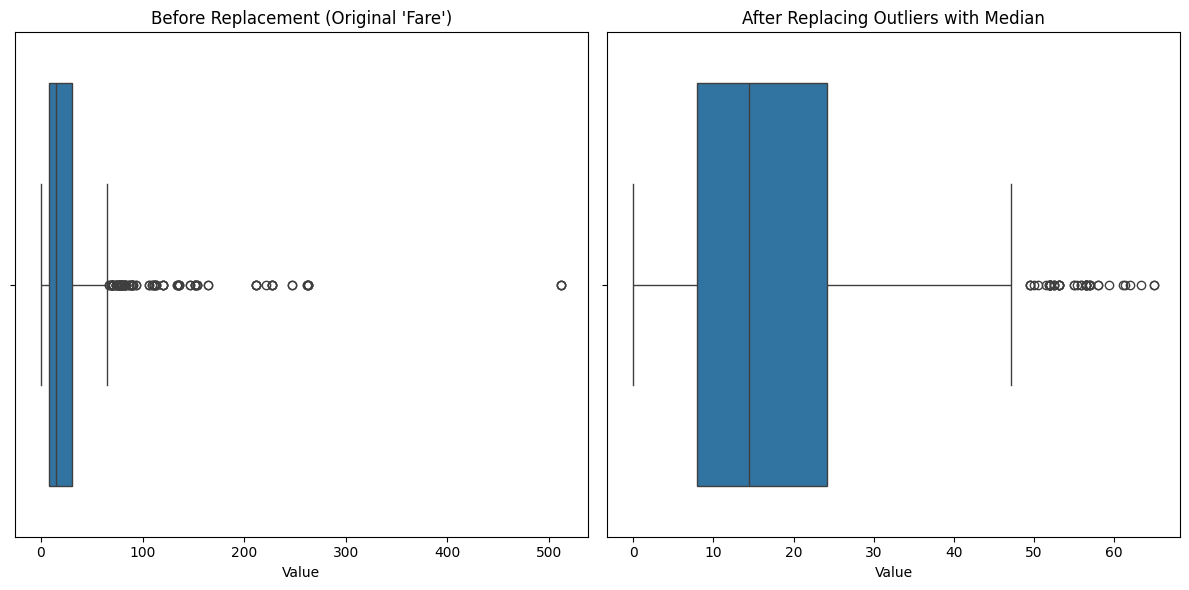

In [ ]:
# 15. Visualize outliers with boxplots.


print("--- 15. Visualizing Boxplots (Before vs. After) ---")

plt.figure(figsize=(12, 6))

# Plot 1: Before
plt.subplot(1, 2, 1)
sns.boxplot(x=features['Fare'])
plt.title("Before Replacement (Original 'Fare')")
plt.xlabel("Value")

# Plot 2: After
plt.subplot(1, 2, 2)
sns.boxplot(x=fare_median_replaced)
plt.title("After Replacing Outliers with Median")
plt.xlabel("Value")

plt.tight_layout() # Prevents plots from overlapping
plt.show()

--- 16. Visualizing with Swarmplot ---
Note: Swarmplot may take a moment to render all 891 points.


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


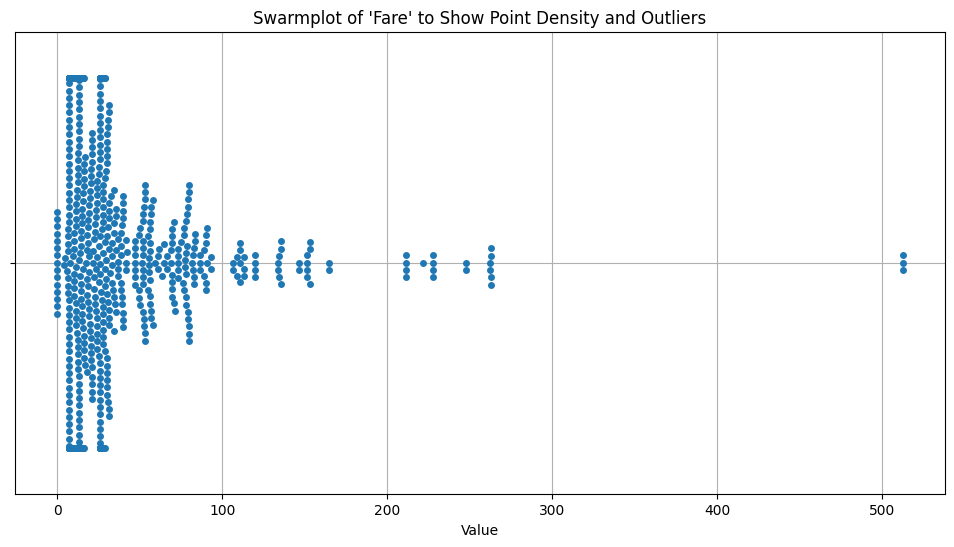

In [ ]:
#16. Use sns.swarmplot() to identify dense outlier clusters.

print("--- 16. Visualizing with Swarmplot ---")
print("Note: Swarmplot may take a moment to render all 891 points.")

plt.figure(figsize=(12, 6))
sns.swarmplot(x=features['Fare'])
plt.title("Swarmplot of 'Fare' to Show Point Density and Outliers")
plt.xlabel("Value")
plt.grid(True)
plt.show()

--- 17. Visualizing Histograms (Before vs. After Removal) ---


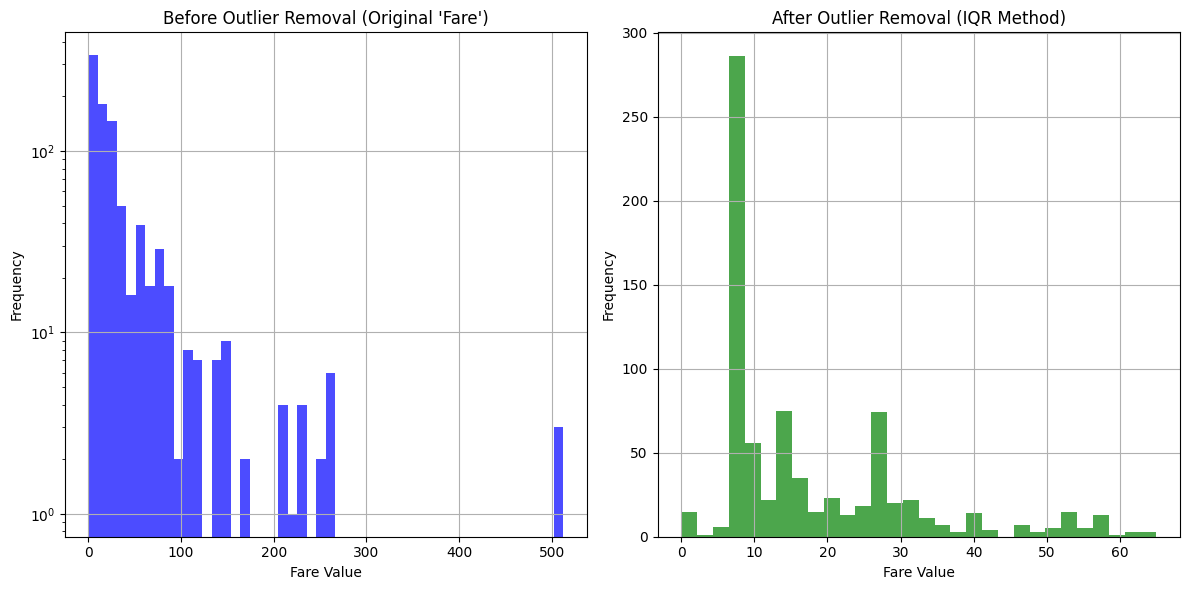

In [ ]:
# 17. Plot histogram before and after outlier removal.

print("--- 17. Visualizing Histograms (Before vs. After Removal) ---")

# 1. Get the "before" and "after" data
fare_original = features['Fare']
fare_no_outliers_iqr = df_no_outliers_iqr['Fare']

# 2. Plot
plt.figure(figsize=(12, 6))

# Plot 1: Before
plt.subplot(1, 2, 1)
plt.hist(fare_original, bins=50, color='blue', alpha=0.7)
plt.title("Before Outlier Removal (Original 'Fare')")
plt.xlabel("Fare Value")
plt.ylabel("Frequency")
# Use log scale to see the distribution of non-outliers better
plt.yscale('log')
plt.grid(True)


# Plot 2: After
plt.subplot(1, 2, 2)
plt.hist(fare_no_outliers_iqr, bins=30, color='green', alpha=0.7)
plt.title("After Outlier Removal (IQR Method)")
plt.xlabel("Fare Value")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 18. Normalize a column using min-max scaling.(Output:Name: Fare_normalized, Length:
#  891, dtype: float64)
def min_max_normalize(data_series):
    """
    Scales a pandas Series to a [0, 1] range using Min-Max scaling.

    Args:
        data_series (pd.Series): The input data.

    Returns:
        pd.Series: The normalized data.
    """
    min_val = data_series.min()
    max_val = data_series.max()

    # Add 1e-8 to denominator to avoid division by zero if all
    # values are the same (max_val - min_val == 0)
    return (data_series - min_val) / (max_val - min_val + 1e-8)

# --- Execute on 'Fare' ---

fare_data = features['Fare']

print("--- 18. Normalizing 'Fare' (Min-Max) ---")
fare_normalized = min_max_normalize(fare_data)
fare_normalized.name = "Fare_normalized" # Set name for clean output

print(fare_normalized)
print("\n--- Verification ---")
print(f"Min: {fare_normalized.min():.1f}") # Should be 0.0
print(f"Max: {fare_normalized.max():.1f}") # Should be 1.0

--- 18. Normalizing 'Fare' (Min-Max) ---
0      0.025374
1      0.014932
2      0.015330
3      0.041136
4      0.101497
         ...   
886    0.058694
887    0.014110
888    0.016908
889    0.015412
890    0.050749
Name: Fare_normalized, Length: 891, dtype: float64

--- Verification ---
Min: 0.0
Max: 1.0


In [ ]:
# 19. Standardize a column using z-score normalization.(Output:Name: Fare_standardized,
#  Length: 891, dtype: float64)
def z_score_standardize(data_series):
    """
    Scales a pandas Series using Z-score standardization (mean=0, std=1).

    Args:
        data_series (pd.Series): The input data.

    Returns:
        pd.Series: The standardized data.
    """
    mean_val = data_series.mean()
    std_val = data_series.std()

    # Add 1e-8 to denominator to avoid division by zero
    # if all values are the same (std_val == 0)
    return (data_series - mean_val) / (std_val + 1e-8)

# --- Execute on 'Fare' ---

fare_data = features['Fare']

print("--- 19. Standardizing 'Fare' (Z-Score) ---")
fare_standardized = z_score_standardize(fare_data)
fare_standardized.name = "Fare_standardized" # Set name for clean output

print(fare_standardized)
print("\n--- Verification ---")
print(f"Mean: {fare_standardized.mean():.2f}") # Should be 0.00
print(f"Std Dev: {fare_standardized.std():.2f}") # Should be 1.00

--- 19. Standardizing 'Fare' (Z-Score) ---
0     -0.386454
1     -0.494114
2     -0.490005
3     -0.223957
4      0.398358
         ...   
886   -0.042931
887   -0.502582
888   -0.473739
889   -0.489167
890   -0.124850
Name: Fare_standardized, Length: 891, dtype: float64

--- Verification ---
Mean: 0.00
Std Dev: 1.00


--- 20. Comparing Histograms ---


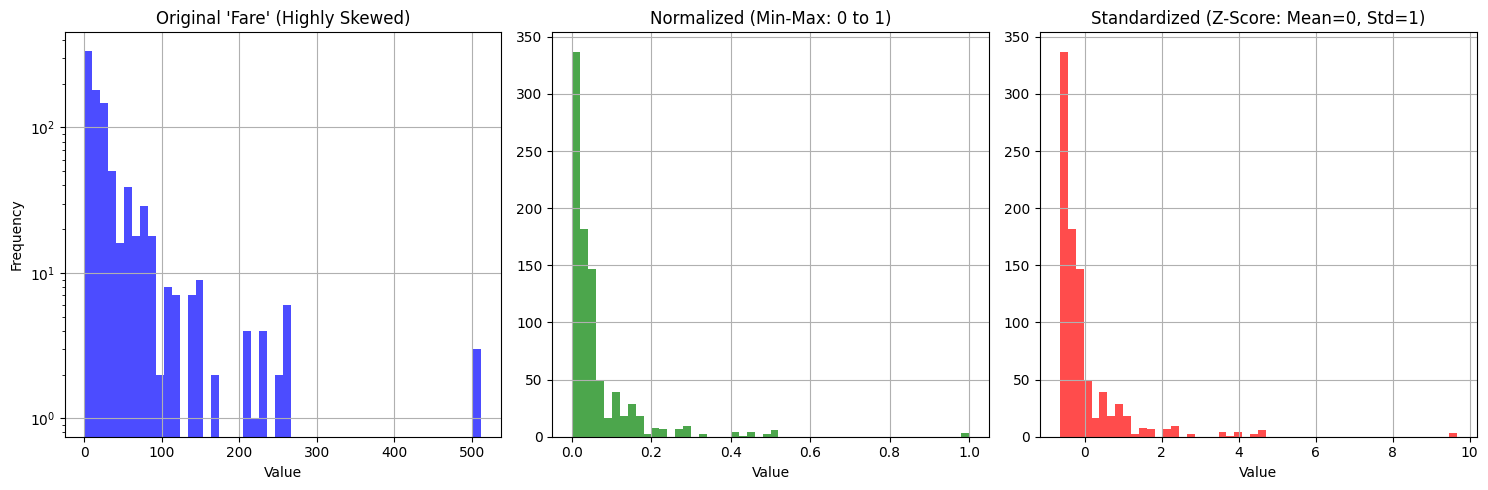


--- Observation ---
Scaling (Normalization or Standardization) changes the scale of the x-axis but does NOT change the shape of the data's distribution. The 'Fare' data remains highly right-skewed.


In [ ]:
# 20. Compare histograms before and after normalization.


print("--- 20. Comparing Histograms ---")

plt.figure(figsize=(15, 5))

# Plot 1: Original
plt.subplot(1, 3, 1)
plt.hist(features['Fare'], bins=50, color='blue', alpha=0.7)
plt.title("Original 'Fare' (Highly Skewed)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.yscale('log') # Use log scale to see the distribution
plt.grid(True)

# Plot 2: Normalized (Min-Max)
plt.subplot(1, 3, 2)
plt.hist(fare_normalized, bins=50, color='green', alpha=0.7)
plt.title("Normalized (Min-Max: 0 to 1)")
plt.xlabel("Value")
plt.grid(True)

# Plot 3: Standardized (Z-score)
plt.subplot(1, 3, 3)
plt.hist(fare_standardized, bins=50, color='red', alpha=0.7)
plt.title("Standardized (Z-Score: Mean=0, Std=1)")
plt.xlabel("Value")
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- Observation ---")
print("Scaling (Normalization or Standardization) changes the scale of "
      "the x-axis but does NOT change the shape of the data's "
      "distribution. The 'Fare' data remains highly right-skewed.")

In [ ]:
#  21. Normalize all numeric columns in a DataFrame.

print("--- 21. Normalizing All Numeric Columns ---")

# 1. Select only columns that are numeric
numeric_cols = features.select_dtypes(include=np.number).columns
print(f"Normalizing numeric columns: {list(numeric_cols)}")

# 2. Create a copy to avoid changing the original 'features' DataFrame
features_normalized = features.copy()

# 3. Loop and apply the function
for col in numeric_cols:
    features_normalized[col] = min_max_normalize(features[col])

# 4. Print the head of the new DataFrame
print("\n--- Head of Fully Normalized DataFrame ---")
print(features_normalized.head())

print("\n--- Verification (Min/Max of each column) ---")
print(features_normalized.describe().loc[['min', 'max']])

--- 21. Normalizing All Numeric Columns ---
Normalizing numeric columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

--- Head of Fully Normalized DataFrame ---
   Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0     0.5  0.0  0.346569  0.000  0.000000  0.025374       0.0
1     1.0  0.0  0.308872  0.000  0.000000  0.014932       0.0
2     1.0  0.0  0.246042  0.000  0.000000  0.015330       0.0
3     1.0  1.0  0.359135  0.000  0.666667  0.041136       0.0
4     0.0  0.0  0.384267  0.125  0.000000  0.101497       0.0

--- Verification (Min/Max of each column) ---
     Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
min     0.0  0.0  0.0    0.0    0.0   0.0       0.0
max     1.0  1.0  1.0    1.0    1.0   1.0       1.0
